In [152]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../final-project-dukeNG2012/My_Raw_Data/user_userProfile.csv')

In [43]:
df = df[3:]

In [50]:
df['User profile link'].iloc[4]

'https://www.facebook.com/profile.php?id=100010960470581&comment_id=Y29tbWVudDo3NDg5OTcyOTA1OTA5NzZfNjczNDA5MDk4MjgyMzEy&__cft__[0]=AZVeyNntvVUuLfqur0jM_a9dIjDmFn5sDaI1Lx4YZh6DvYZukkizDWddwYB-lX2ESi5Ic_PUlA4U8LgxbkdCkMq_mT8OPLIVyshR4oxBm5QCpnpyHtshVy-EyV1SzNOEx5mDksvzujIIpIXOJTVID3vY&__tn__=R]-R'

In [86]:
#! get into facebook, get to facebook link, get user info 
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
executable_path = "../MyChromeDriver/chromedriver.exe"
option1 = Options()
option1.add_argument('--disable-notifications')
# 1. Khai bao bien browser
browser  = webdriver.Chrome(executable_path=executable_path,chrome_options=option1)

# 2. Mở facebook
browser.get("http://facebook.com")

# 2a. Điền thông tin vào ô user và pass

txtUser = browser.find_element_by_id("email")
txtUser.send_keys("ledangquan287@gmail.com") # User name nick em

txtPass = browser.find_element_by_id("pass")
txtPass.send_keys("Nguyenminhduc") # Password

# 2b. làm xong thì enter

txtPass.send_keys(Keys.ENTER)


sleep(5)
live_in = []
# 3. Mở URL của post
for i in range(len(df)):
    browser.get(df['User profile link'].iloc[i])
    sleep(5)
    link = browser.find_elements_by_class_name("x1yztbdb")
    live_in.append(link[0].text)


sleep(5)

# 6. Đóng browser
browser.close()

# #! save data to csv
df['infomation'] = live_in

IndexError: list index out of range

In [132]:
#! lỗi từ 355 nên mình sẽ crawl từ 366 tới hết: Việc lỗi này là do người dùng có thể mất fb. Đó là điều
#! không thể lường trước được.
browser  = webdriver.Chrome(executable_path=executable_path,chrome_options=option1)

# 2. Mở facebook
browser.get("http://facebook.com")

# 2a. Điền thông tin vào ô user và pass

txtUser = browser.find_element_by_id("email")
txtUser.send_keys("ledangquan287@gmail.com") # User name nick em

txtPass = browser.find_element_by_id("pass")
txtPass.send_keys("Nguyenminhduc") # Password
# 2b. làm xong thì enter

txtPass.send_keys(Keys.ENTER)
for i in range(357,len(df)):
    browser.get(df['User profile link'].iloc[i])
    sleep(5)
    link = browser.find_elements_by_class_name("x1yztbdb")
    live_in.append(link[0].text)

sleep(5)
browser.close()

In [89]:
len(live_in) #! tìm xem là inddex out of range bắt đầu từ personal profile dòng nào 

355

In [134]:
len(live_in) #! sau khi skip qua nick ông bị mất nick

446

In [137]:
df_new = pd.DataFrame({'commenter':df['User name'][:446],'Infomation':live_in})

In [138]:
substring = []
for i in range(len(df_new['Infomation'])):
    for line in df_new['Infomation'].iloc[i].split("\n"):
        # print(line)
        if "Works at" in line:
            substring.append(line)
        if "Lives in" in line:
            substring.append(line)
        if "Went to" in line:
            substring.append(line)
print(substring)

['Works at Thanh Hóa', 'Lives in Hải Dương', 'Went to News-THPT Tháp Chàm', 'Lives in Phan Rang-Tháp Chàm, Ninh Thuận, Vietnam', 'Went to THPT Tien Du 1', 'Lives in Hanoi, Vietnam', 'Lives in Thanh Hóa', 'Lives in Le Thuy', 'Works at THPT Trần Hưng Đạo - BRVT', 'Works at Benh Vien Ba Ria', 'Went to THPT Trần Hưng Đạo - BRVT', 'Lives in Xa Vung Tau, Bà Rịa-Vũng Tàu, Vietnam', 'Works at VIB - Ngân Hàng Quốc Tế', 'Went to Trường Quốc Tế Á Châu - Asian High School', 'Lives in Ho Chi Minh City, Vietnam', 'Lives in Hue, Vietnam', 'Went to Ngo Quyen High School', 'Went to THPT Nguyễn Du', 'Lives in Ho Chi Minh City, Vietnam', 'Went to THPT Bạch Đằng - Thủy Nguyên - Hải Phòng', 'Lives in Hai Phong, Vietnam', 'Lives in Hà Tĩnh', 'Lives in Ho Chi Minh City, Vietnam', 'Lives in Cà Mau', 'Lives in Hai Phong, Vietnam', 'Lives in Hanoi, Vietnam', 'Went to Trường THPT Lý Tự Trọng - Hà Tĩnh', 'Lives in Hanoi, Vietnam', 'Lives in Ho Chi Minh City, Vietnam', 'Lives in Ba Don', 'Lives in Hanoi, Vietnam',

In [139]:
len(substring)

321

In [140]:
places = []
for string in substring:
    if "Works at" in string:
        places.append(string.replace("Works at",""))
    if "Lives in" in string:
        places.append(string.replace("Lives in",""))

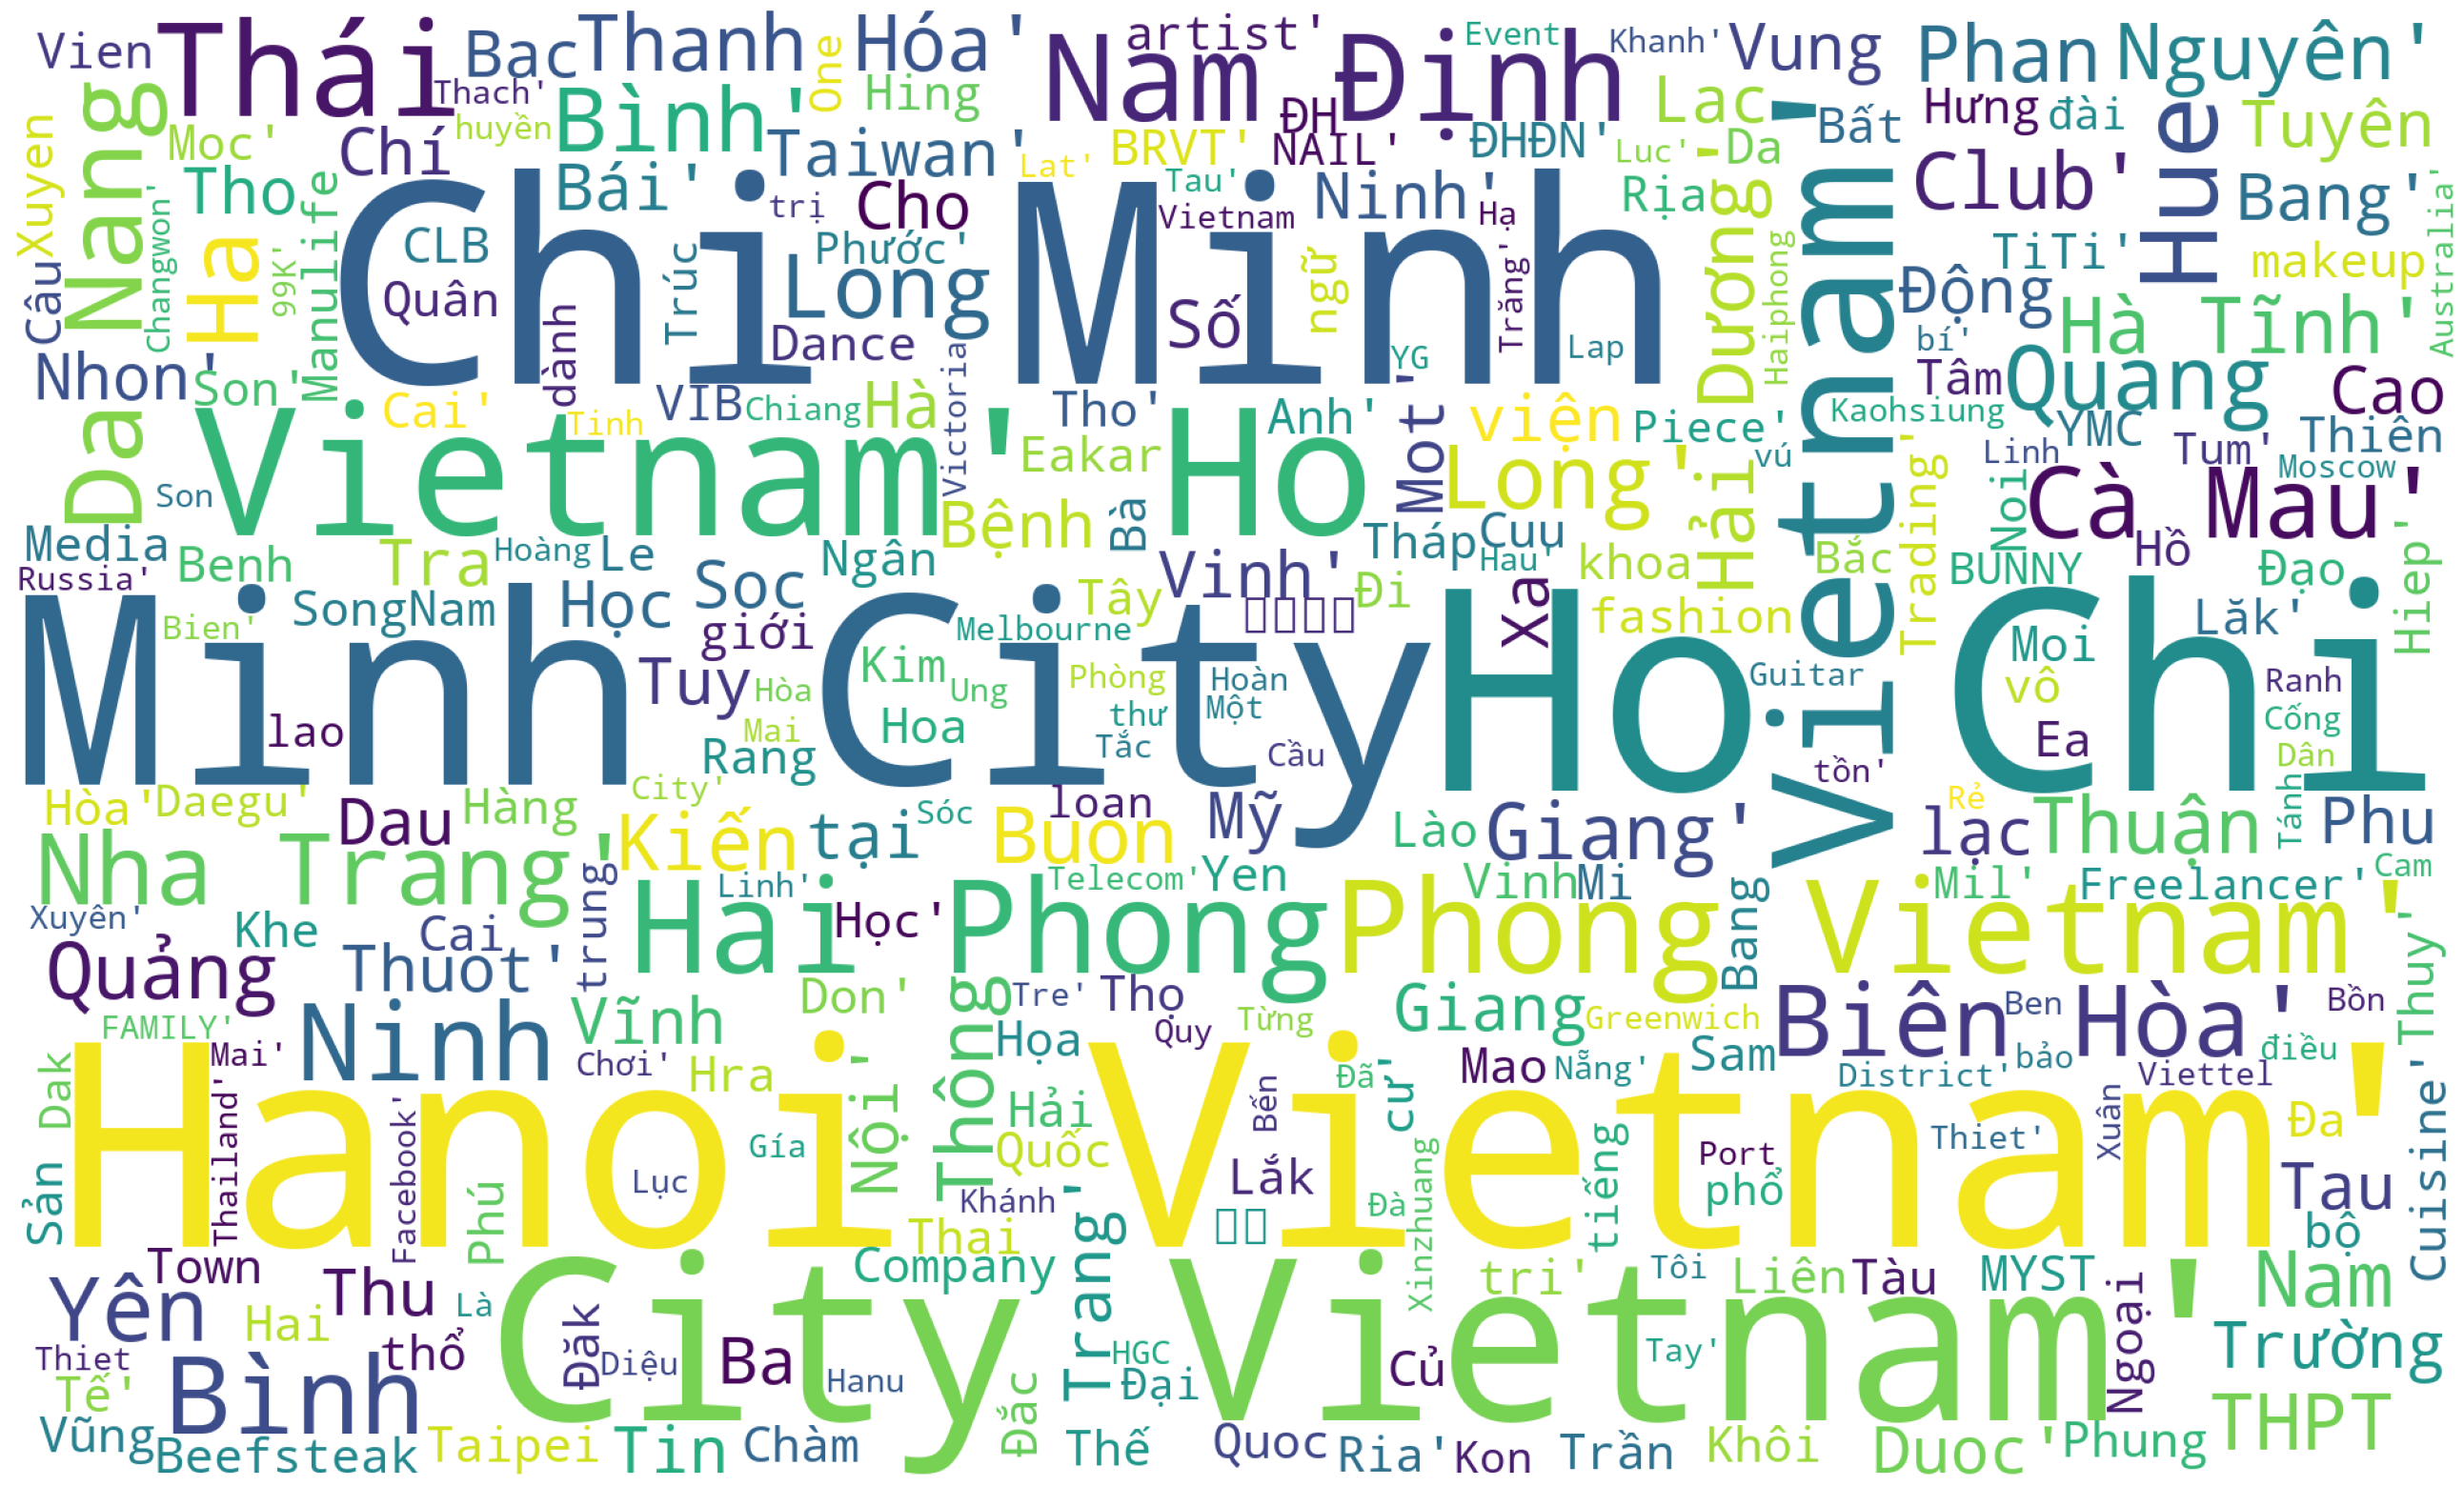

In [141]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(places))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [143]:
df_new['Infomation']

3      Intro\nDaseinzumtode 💔\nWorks at Thanh Hóa\nFo...
4      Intro\nLives in Hải Dương\nFollowed by 23 peop...
5      Intro\nONLY YOU\nWent to News-THPT Tháp Chàm\n...
6      Intro\nStudied at Đoàn Trường THPT Nguyễn Đăng...
7      Intro\nhoa\nWent to THPT Tien Du 1\nLives in H...
                             ...                        
444                                                Intro
445    Intro\nJe m'aime\nWent to THPT chuyên Lê Hồng ...
446                                       Intro\nbdinhhh
447    Intro\n~Aquarius~\nLives in Bac Giang\nFrom Ba...
448    Intro\n❀-~♡ 🐇\nStudies Khoa Y - Chuyên Ngành K...
Name: Infomation, Length: 446, dtype: object

In [145]:
follow_by = []
for i in range(len(df_new['Infomation'])):
    for line in df_new['Infomation'].iloc[i].split("\n"):
        # print(line)
        if "Followed by" in line:
            follow_by.append(line)
print(follow_by)

['Followed by 800 people', 'Followed by 23 people', 'Followed by 27 people', 'Followed by 246 people', 'Followed by 264 people', 'Followed by 16 people', 'Followed by 1,901 people', 'Followed by 623 people', 'Followed by 68 people', 'Followed by 1,427 people', 'Followed by 602 people', 'Followed by 2,780 people', 'Followed by 226 people', 'Followed by 206 people', 'Followed by 699 people', 'Followed by 42 people', 'Followed by 109 people', 'Followed by 318 people', 'Followed by 97 people', 'Followed by 2 people', 'Followed by 1,913 people', 'Followed by 495 people', 'Followed by 1,472 people', 'Followed by 3,412 people', 'Followed by 1,723 people', 'Followed by 701 people', 'Followed by 2,139 people', 'Followed by 1,229 people', 'Followed by 752 people', 'Followed by 1,272 people', 'Followed by 1,354 people', 'Followed by 5,655 people', 'Followed by 2,134 people', 'Followed by 217 people', 'Followed by 1 person', 'Followed by 125 people', 'Followed by 3,038 people', 'Followed by 1,049 

In [164]:
user_follower = []
for str in follow_by:
    for follow_num in str.split(): 
        if follow_num.isdigit():
            user_follower.append(int(follow_num))

In [165]:
len(user_follower)

111

In [167]:
x = np.arange(1,len(user_follower)+1,1)
y = user_follower
user_follower_df = pd.DataFrame({'number of user':x,'followers':y})

<Axes: title={'center': 'Biểu đồ phân bố số người có lượt theo dõi'}, xlabel='followers', ylabel='Count'>

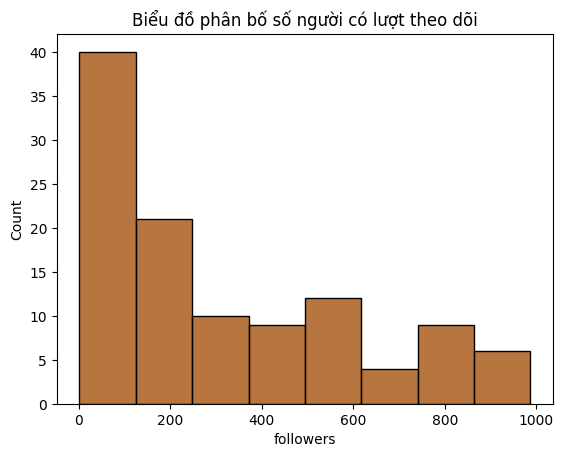

In [172]:
plt.title("Biểu đồ phân bố số người có lượt theo dõi")
colors = sns.color_palette('bright')[5]
sns.histplot(data=user_follower_df,x='followers',color=colors)

<BarContainer object of 111 artists>

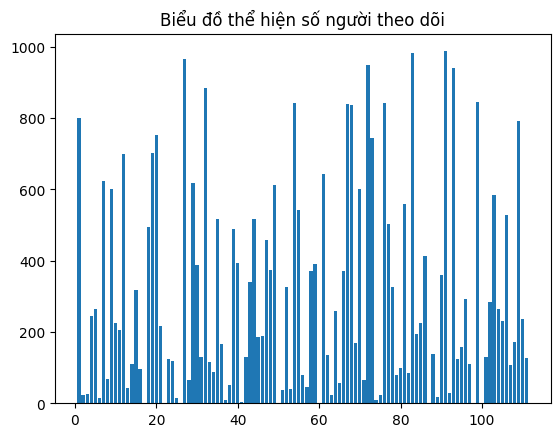

In [174]:
plt.title("Biểu đồ thể hiện số người theo dõi")
plt.bar(x=user_follower_df['number of user'],height=user_follower_df['followers'])